<a href="https://colab.research.google.com/github/nirvanK11/Predicting-Which-Medication-using-decision-tree/blob/main/Predicting_Which_Medication_using_decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Predicting Which Medication might be appropriate for a future patient suffering from the same illness**

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

from sklearn import tree
from IPython.display import Image
from subprocess import check_call

from sklearn.metrics import confusion_matrix, classification_report

# RFE: recursive feature elimination -> to identify the best features in the dataset
from sklearn.feature_selection import RFE
from io import StringIO


In [ ]:
pd.set_option("display.max_columns",1000)
pd.set_option("display.max_rows",1000)


In [ ]:
df= pd.read_csv("drug200.csv")

In [ ]:
df.head()


,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [ ]:
df.shape

(200, 6)

In [ ]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [ ]:
df.isnull().sum()*100/len(df)

Age            0.0
Sex            0.0
BP             0.0
Cholesterol    0.0
Na_to_K        0.0
Drug           0.0
dtype: float64

In [ ]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [ ]:
df[df["Age"] < 50]

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
5,22,F,NORMAL,HIGH,8.607,drugX
6,49,F,NORMAL,HIGH,16.275,drugY
7,41,M,LOW,HIGH,11.037,drugC
9,43,M,LOW,NORMAL,19.368,drugY
10,47,F,LOW,HIGH,11.767,drugC
11,34,F,HIGH,NORMAL,19.199,drugY


In [ ]:
df = pd.concat([df, pd.get_dummies(df["Sex"], drop_first=True)], axis = 1)


In [ ]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug,M
0,23,F,HIGH,HIGH,25.355,drugY,0
1,47,M,LOW,HIGH,13.093,drugC,1
2,47,M,LOW,HIGH,10.114,drugC,1
3,28,F,NORMAL,HIGH,7.798,drugX,0
4,61,F,LOW,HIGH,18.043,drugY,0


In [ ]:
df_1 = pd.concat([df, pd.get_dummies(df[["BP","Cholesterol"]], drop_first=True)], axis = 1)

In [ ]:
df_1 = pd.concat([df, pd.get_dummies(df[["BP","Cholesterol"]], drop_first=True)], axis = 1)
df_1.head()


,Age,Sex,BP,Cholesterol,Na_to_K,Drug,M,BP_LOW,BP_NORMAL,Cholesterol_NORMAL
0,23,F,HIGH,HIGH,25.355,drugY,0,0,0,0
1,47,M,LOW,HIGH,13.093,drugC,1,1,0,0
2,47,M,LOW,HIGH,10.114,drugC,1,1,0,0
3,28,F,NORMAL,HIGH,7.798,drugX,0,0,1,0
4,61,F,LOW,HIGH,18.043,drugY,0,1,0,0


In [ ]:
df_1.drop(["BP","Cholesterol", "Sex"],inplace = True , axis =1)

df_1.head()

,Age,Na_to_K,Drug,M,BP_LOW,BP_NORMAL,Cholesterol_NORMAL
0,23,25.355,drugY,0,0,0,0
1,47,13.093,drugC,1,1,0,0
2,47,10.114,drugC,1,1,0,0
3,28,7.798,drugX,0,0,1,0
4,61,18.043,drugY,0,1,0,0


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
y = df_1.iloc[:, 2].values

labelencoder = LabelEncoder()
y= labelencoder.fit_transform(y)
y

array([4, 2, 2, 3, 4, 3, 4, 2, 4, 4, 2, 4, 4, 4, 3, 4, 3, 0, 2, 4, 4, 4,
       4, 4, 4, 4, 4, 3, 4, 4, 3, 1, 3, 4, 3, 3, 0, 3, 3, 3, 4, 1, 4, 3,
       3, 3, 0, 2, 4, 4, 4, 3, 4, 4, 1, 2, 1, 4, 3, 4, 4, 0, 4, 3, 1, 4,
       0, 3, 4, 4, 1, 4, 3, 4, 4, 4, 0, 4, 0, 3, 1, 3, 2, 0, 2, 1, 3, 4,
       4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 0, 0, 2, 3, 4, 3, 3, 4, 1, 4,
       0, 3, 3, 3, 3, 4, 3, 3, 0, 4, 4, 4, 4, 4, 1, 4, 4, 3, 4, 3, 4, 4,
       3, 4, 4, 3, 1, 0, 1, 3, 0, 4, 1, 4, 0, 3, 3, 0, 3, 2, 0, 1, 3, 3,
       4, 2, 0, 4, 2, 3, 3, 1, 3, 4, 4, 4, 4, 3, 4, 0, 3, 3, 4, 4, 0, 4,
       0, 4, 4, 4, 4, 3, 3, 4, 4, 4, 1, 0, 4, 4, 4, 0, 4, 2, 4, 2, 2, 3,
       3, 3])

In [ ]:
df_1.head()

,Age,Na_to_K,Drug,M,BP_LOW,BP_NORMAL,Cholesterol_NORMAL
0,23,25.355,drugY,0,0,0,0
1,47,13.093,drugC,1,1,0,0
2,47,10.114,drugC,1,1,0,0
3,28,7.798,drugX,0,0,1,0
4,61,18.043,drugY,0,1,0,0


In [ ]:

x = df_1.drop("Drug", axis= 1)
x.head()

,Age,Na_to_K,M,BP_LOW,BP_NORMAL,Cholesterol_NORMAL
0,23,25.355,0,0,0,0
1,47,13.093,1,1,0,0
2,47,10.114,1,1,0,0
3,28,7.798,0,0,1,0
4,61,18.043,0,1,0,0


In [ ]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier  (criterion="gini", max_depth =4)
model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
model.fit(X_train,y_train)

y_train_predict = model.predict(X_train)

y_train_predict

array([0, 4, 1, 4, 3, 4, 4, 4, 4, 1, 3, 3, 3, 1, 0, 3, 4, 3, 0, 3, 2, 4,
       0, 0, 0, 1, 1, 0, 4, 0, 4, 4, 0, 4, 4, 4, 3, 4, 3, 4, 4, 3, 1, 3,
       4, 0, 2, 4, 3, 3, 4, 4, 3, 3, 1, 4, 1, 3, 4, 4, 4, 1, 2, 0, 4, 4,
       4, 0, 3, 3, 4, 2, 4, 4, 3, 1, 3, 3, 4, 4, 4, 4, 4, 4, 1, 3, 2, 0,
       4, 0, 0, 3, 4, 4, 4, 4, 3, 4, 0, 3, 4, 4, 3, 4, 3, 1, 4, 4, 2, 3,
       4, 4, 4, 4, 3, 4, 3, 3, 4, 2, 2, 4, 2, 4, 1, 3, 4, 3, 4, 4, 4, 3,
       4, 4, 4, 3, 3, 4, 4, 2])

In [ ]:
from sklearn.metrics import classification_report


In [ ]:
y_pred= model.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00        18
           4       1.00      1.00      1.00        26

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt


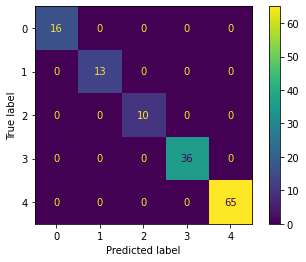

In [ ]:
plot_confusion_matrix(model, X_train, y_train)
plt.show()

In [ ]:

from sklearn.metrics import precision_score, recall_score, fbeta_score

def classification_metics(y_actual,y_pred):
    precision = precision_score(y_actual,y_pred)
    recall= recall_score(y_actual,y_pred)
    fb = fbeta_score(y_actual,y_pred,beta =1)
    return('Precision:{} Recall:{} F1_Score:{}'.format(round(precision,2), round(recall,2),round(fb,2)))

In [ ]:

from sklearn import metrics
print("Accuracy of the decision tree: ", metrics.accuracy_score(y_test,model))


TypeError: ignored

In [ ]:
from sklearn import tree
from sklearn.tree import export_graphviz

from sklearn.externals.six import StringIO  

from IPython.display import Image  

import pydotplus

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


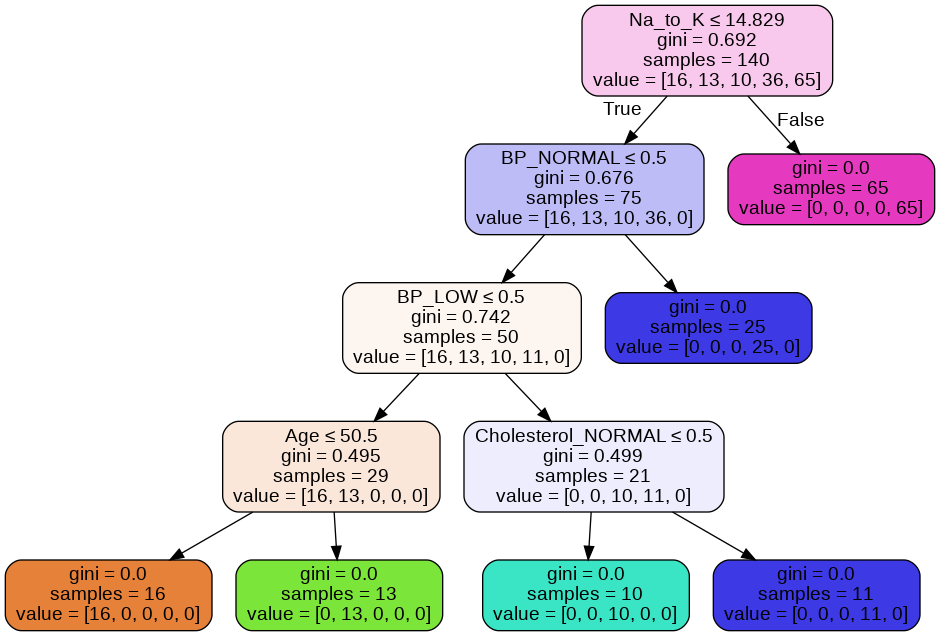

In [ ]:

feature = ["Age",	"Na_to_K",	"M","BP_LOW",	"BP_NORMAL",	"Cholesterol_NORMAL"]

dot_data = StringIO()

tree.export_graphviz(model, out_file=dot_data,  

                filled=True, rounded=True,

                special_characters=True,feature_names = feature  )

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

graph.write_png('heart.png')

Image(graph.create_png())